In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='index'))

### matplotlib bar plot

In [2]:
import matplotlib.pyplot as plt

In [4]:
#?plt.bar

In [7]:
df['A']

one      0.705547
two      0.510578
three    0.432907
four     0.869657
five     0.632198
six      0.411837
Name: A, dtype: float64

### pandas dataframe barplot

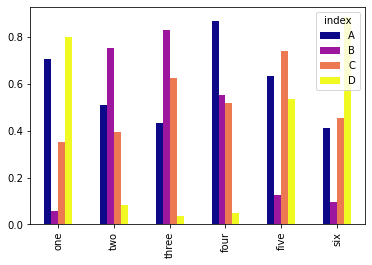

In [9]:
df.plot.bar(cmap='plasma')

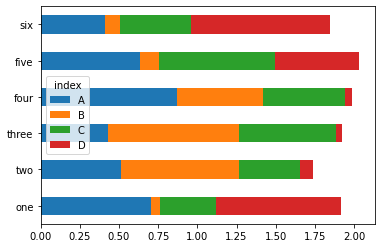

In [10]:
df.plot.barh(stacked=True)

### QUIZ
### tips 데이터

- ex1) 요일별 팁의 액수를 합산하여 막대그래프 시각화(1인, 6인 파티는 제외)
- ex2) 요일별 파티 사이즈별 파티 횟수 카운트 하여 막대그래프 시각화(size 2,3,4인만 카운트)

In [12]:
import pandas as pd
import numpy as np

In [6]:
tips = pd.read_csv("data/tips.csv")

In [7]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [8]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

In [26]:
# ex1)

In [69]:
tips_ex1 = tips.pivot_table('tip_pct', index=['day'], aggfunc=np.sum)

In [70]:
tips_ex1

,tip_pct
day,
Fri,3.228348
Sat,13.324199
Sun,12.684194
Thur,9.999089


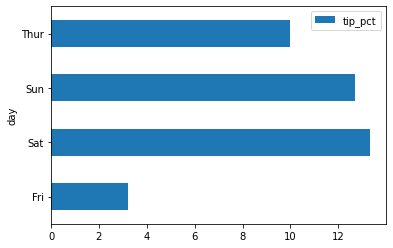

In [71]:
tips_ex1.plot.barh(stacked=True)

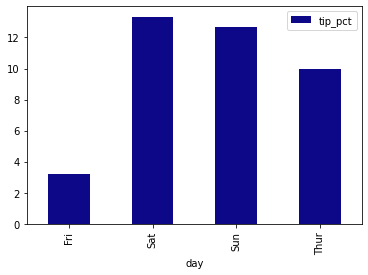

In [65]:
tips_ex1.plot.bar(cmap='plasma')

In [28]:
# ex2)

In [41]:
tips_ex2 = tips.pivot_table('tip', index=['day'], columns=['size'], aggfunc=[len])

In [42]:
tips_ex2

len                            
size    1     2     3     4    5    6
day                                  
Fri   1.0  16.0   1.0   1.0  NaN  NaN
Sat   2.0  53.0  18.0  13.0  1.0  NaN
Sun   NaN  39.0  15.0  18.0  3.0  1.0
Thur  1.0  48.0   4.0   5.0  1.0  3.0

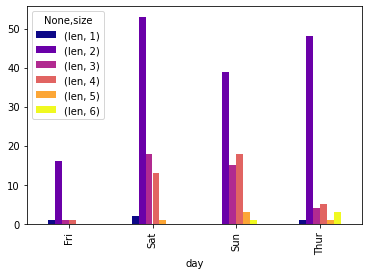

In [43]:
tips_ex2.plot.bar(cmap='plasma')

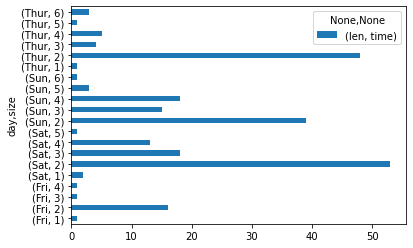

In [110]:
tips_ex2.plot.barh(stacked=True)

In [1]:
# 정답

In [24]:
tips3 = pd.crosstab(tips['day'], tips['size'])

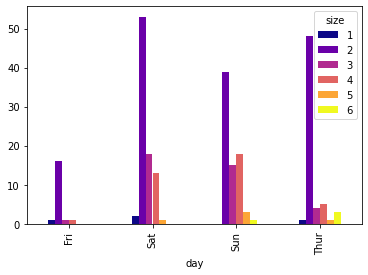

In [25]:
tips3.plot.bar(cmap='plasma')

In [ ]:
# 더 정교한 정답

In [9]:
tips1 = tips.loc[~tips['size'].isin([1,6]),:]

In [10]:
tips2 = tips.loc[~tips['size'].isin([5]),:]

In [13]:
np.unique(tips2['size'])

array([1, 2, 3, 4, 6], dtype=int64)

In [15]:
party_counts = pd.crosstab(tips2['day'], tips2['size'])

In [16]:
p_count = party_counts.loc[['Thur', 'Fri', 'Sat', 'Sun']]

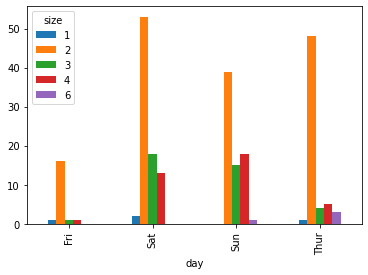

In [17]:
party_counts.plot.bar()

### QUIZ

sample_1.xlsx 파일을 불러와서 다음을 수행하세요

​

- 1. 국적코드, 성별, 입국객수 3개 컬럼 사용

- 2. 데이터 정보 확인하기

- 3. 데이터 기초 통계량 확인

- 4-1. 입국객수 컬럼 추출

- 4-2. 국적코드, 입국객수 2개 컬럼 추출

- 4-3. 기준년월 컬럼 생성하여 2019-11 값 넣기

- 5-1. 성별 남성 서브세팅

- 5-2. 입국객수 15만명 이상 서브세팅

- 5-3. 남성이면서 입국객수 15만명 이상 서브세팅

- 5-4. 국적코드 A01과 A18 서브세팅 

In [26]:
sample_1 = pd.read_excel("data/sample_1.xlsx", header=0)

In [152]:
sample_1

,2019년 11월 입국객 수,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,국적코드,성별,입국객수,전년동기
1,A01,남성,106320,85815
2,A01,여성,191436,125241
3,A31,남성,319,299
4,A31,여성,42,54
5,A18,남성,158912,124486
6,A18,여성,232943,163466
7,총 합계,689972,NaN,NaN
8,전년동기,499361,NaN,NaN


In [157]:
type(sample_1)

pandas.core.frame.DataFrame

In [178]:
#1. 국적코드, 성별, 입국객수 3개 컬럼 사용

In [28]:
sample_1 = sample_1.drop(0)

In [29]:
sample_1 = sample_1.rename({'2019년 11월 입국객 수':'국적코드', 'Unnamed: 1':'성별', 'Unnamed: 2':'입국객수', 'Unnamed: 3':'전년동기'}, axis='columns')

In [30]:
del sample_1['전년동기']

In [31]:
sample_1

,국적코드,성별,입국객수
1,A01,남성,106320
2,A01,여성,191436
3,A31,남성,319
4,A31,여성,42
5,A18,남성,158912
6,A18,여성,232943
7,총 합계,689972,NaN
8,전년동기,499361,NaN


In [ ]:
#2 데이터 정보 확인하기

In [179]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    8 non-null      object
 1   성별      8 non-null      object
 2   입국객수    6 non-null      object
dtypes: object(3)
memory usage: 256.0+ bytes


In [180]:
#3 데이터 기초 통계량 확인

In [182]:
print(sample_1.describe())

       국적코드  성별  입국객수
count     8   8     6
unique    5   4     6
top     A18  여성   319
freq      2   3     1


In [ ]:
#4 입국객수 컬럼 추출

In [183]:
sample_1[['입국객수']]

,입국객수
1,106320
2,191436
3,319
4,42
5,158912
6,232943
7,NaN
8,NaN


In [ ]:
#4-2 국적코드, 입국객수 2개 컬럼 추출

In [185]:
sample_1[['국적코드', '입국객수']]

,국적코드,입국객수
1,A01,106320
2,A01,191436
3,A31,319
4,A31,42
5,A18,158912
6,A18,232943
7,총 합계,NaN
8,전년동기,NaN


In [ ]:
# 4-3. 기준년월 컬럼 생성하여 2019-11 값 넣기

In [186]:
sample_1['기준년월'] = '2019-11'

In [187]:
sample_1

,국적코드,성별,입국객수,기준년월
1,A01,남성,106320,2019-11
2,A01,여성,191436,2019-11
3,A31,남성,319,2019-11
4,A31,여성,42,2019-11
5,A18,남성,158912,2019-11
6,A18,여성,232943,2019-11
7,총 합계,689972,NaN,2019-11
8,전년동기,499361,NaN,2019-11


In [ ]:
# 5-1. 성별 남성 서브세팅

In [189]:
sample_1[sample_1['성별']=='남성']

,국적코드,성별,입국객수,기준년월
1,A01,남성,106320,2019-11
3,A31,남성,319,2019-11
5,A18,남성,158912,2019-11


In [ ]:
# 5-2. 입국객수 15만명 이상 서브세팅

In [190]:
sample_1[sample_1['입국객수'] >= 150000]

,국적코드,성별,입국객수,기준년월
2,A01,여성,191436,2019-11
5,A18,남성,158912,2019-11
6,A18,여성,232943,2019-11


In [ ]:
# 5-3. 남성이면서 입국객수 15만명 이상 서브세팅

In [191]:
sample_1[(sample_1['성별']=='남성') & (sample_1['입국객수']>=150000)]

,국적코드,성별,입국객수,기준년월
5,A18,남성,158912,2019-11


In [ ]:
# 5-4. 국적코드 A01과 A18 서브세팅 

In [194]:
sample_1[(sample_1['국적코드'] == 'A01') | (sample_1['국적코드'] == 'A18')]

,국적코드,성별,입국객수,기준년월
1,A01,남성,106320,2019-11
2,A01,여성,191436,2019-11
5,A18,남성,158912,2019-11
6,A18,여성,232943,2019-11


In [32]:
# (또 다른 방법)
sample_1[sample_1['국적코드'].isin(['A01', 'A18'])]

,국적코드,성별,입국객수
1,A01,남성,106320
2,A01,여성,191436
5,A18,남성,158912
6,A18,여성,232943
